In [1]:
import glob
import random

import numpy as np

from keyrover.effects import *
from keyrover import *

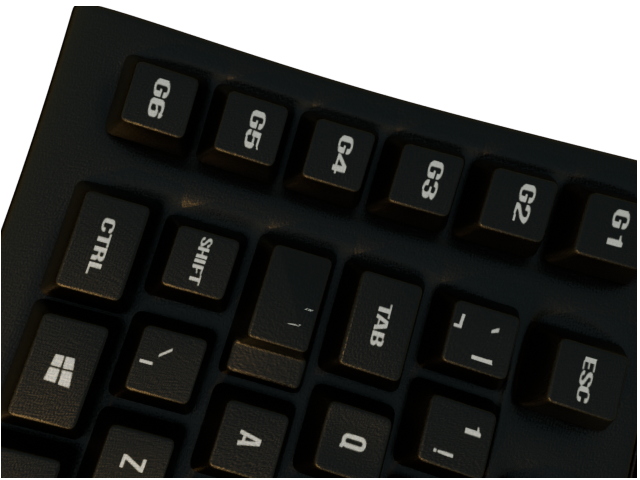

In [4]:
path = random.choice(glob.glob(f"{RAW_RENDERS}/*"))
image = Image.open(path)
image

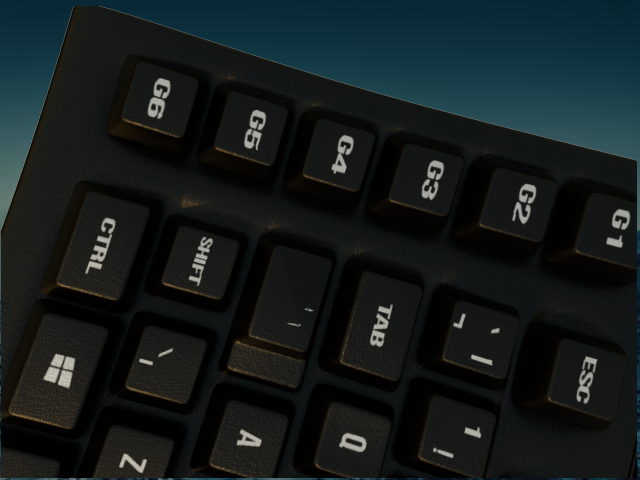

In [5]:
path = random.choice(glob.glob(f"{RESIZED_BACKGROUNDS}/*"))
background = Image.open(path)
background = background.resize(image.size)
background = background.convert("RGBA")

background.paste(image, mask=image)
background

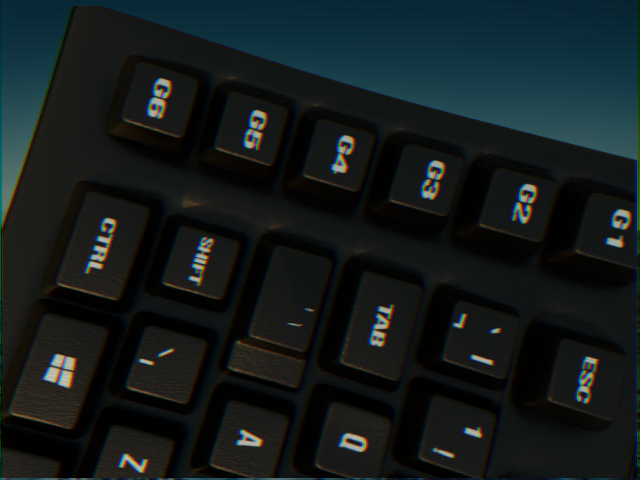

In [6]:
chromatic = add_chromatic_aberration(background, strength=0.005)
chromatic = Image.fromarray(chromatic)
chromatic

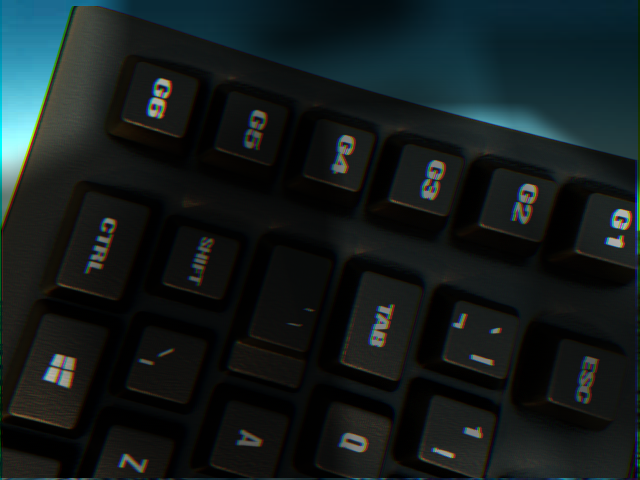

In [7]:
output = chromatic.convert("RGBA")
overlay_funcs = (add_hard_overlay, add_soft_shadow)

n = np.random.geometric(0.5, (1,))[0] - 1
n = 5
for i in range(n):
    overlay_func = random.choice(overlay_funcs)
    output = overlay_func(output)

output

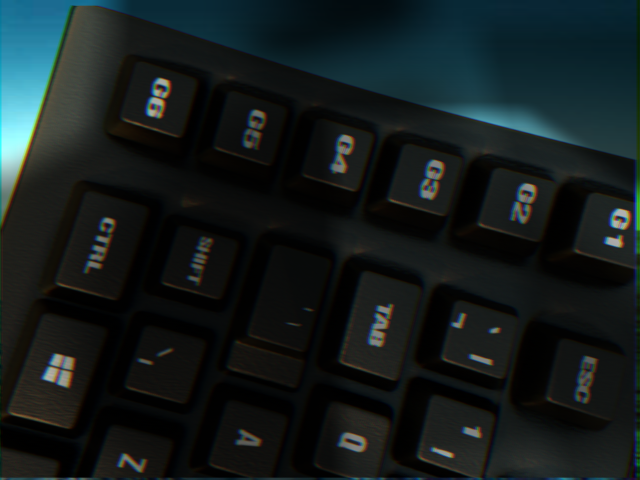

In [8]:
# Greater ksize = more motion blur
# Greater thickness = more gaussian blur

blurred = apply_motion_blur(output, theta=30, ksize=6)
Image.fromarray(blurred)

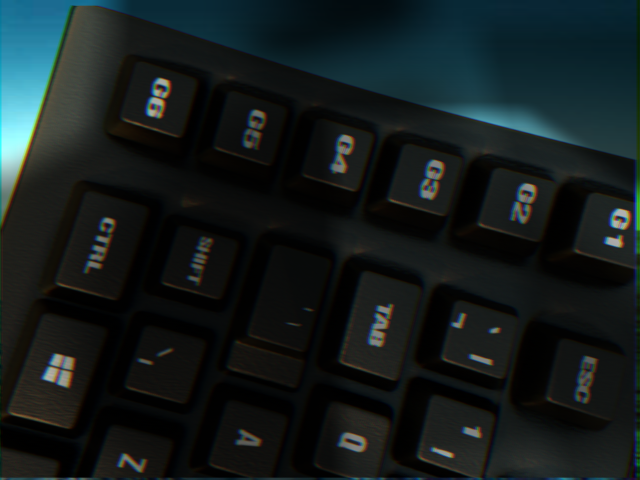

In [9]:
output = Image.fromarray(blurred)

contrast, exposure, sharpness, saturation = np.random.normal(loc=1.0, scale=0.0, size=4)
contrast = max(contrast, 0.5)
exposure = max(exposure, 1)

output = ImageEnhance.Contrast(output).enhance(contrast)
output = ImageEnhance.Brightness(output).enhance(exposure)
output = ImageEnhance.Sharpness(output).enhance(sharpness)
output = ImageEnhance.Color(output).enhance(saturation)
output

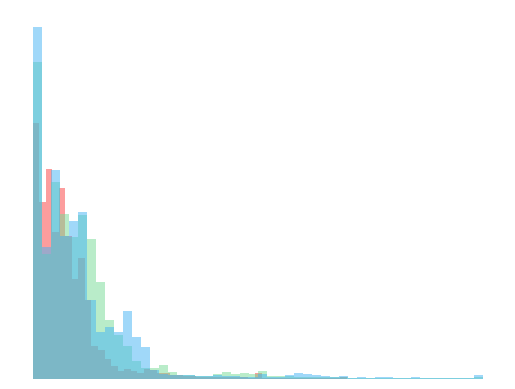

In [10]:
imhist(output)